In [1]:
from typing import Dict,TypedDict,List 
from langgraph.graph import StateGraph,START,END

In [23]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int

In [28]:
def adder(state: AgentState) -> AgentState:
    """This node adds the numbers"""
    
    state['finalNumber'] = state["number1"] + state["number2"]
    return state

def substractor(state:AgentState) -> AgentState:
    """This node substract the 2 numbers"""
    state['finalNumber'] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"
    
def adder2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state["number3"] + state["number4"]
    return state

def substractor2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state["number3"] - state["number4"]
    return state

def decide_next_node2(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [29]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("substract_node",substractor)
graph.add_node("add_node2",adder2)
graph.add_node("substract_node2",substractor2)

graph.add_node("router",lambda state:state) 
graph.add_node("router2",lambda state:state) 


graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    
    {
        # Edge: Node
        "addition_operation":"add_node",
        'subtraction_operation':"substract_node"
    }
)

graph.add_edge("add_node","router2")
graph.add_edge("substract_node","router2")


graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    
    {
        # Edge: Node
        "addition_operation2":"add_node2",
        'subtraction_operation2':"substract_node2"
    }
)
graph.add_edge("add_node2",END)
graph.add_edge("substract_node2", END)

app = graph.compile()


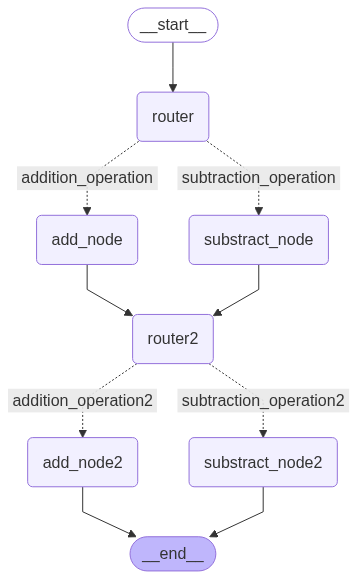

In [30]:
from IPython.display import Image, display 
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
initial_state_1 = AgentState(number1=10, operation="-", number2=5, number3=7, number4=2,operation2="+",finalNumber=0,finalNumber2=0)
print(app.invoke(initial_state_1))

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation': '-', 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}
